# Assigment 1: Input data

* All four wind farms offer at zero price.
* We assume a single time period only.
* The remaining input data is uploaded on DTU learn (a PDF file) and also available in thislink (First click. If it doesn’t work, please copy and paste the link):
https://drive.google.com/file/d/1IkRQVYhBhX1B1tP1nWjFvh4MlFc6WSkC/view?usp=sharing

<font color='red'>**Correction:**</font> 

The table in the link gives the reactance (not the susceptance) of transmission lines.
Remember that susceptance=1/reactance. For example, the susceptance of line connecting
buses 1 and 2 is 1/0.0146 = 68.49 per‐unit. In the DC power flow model, you can directly
include this per‐unit value in your problem.

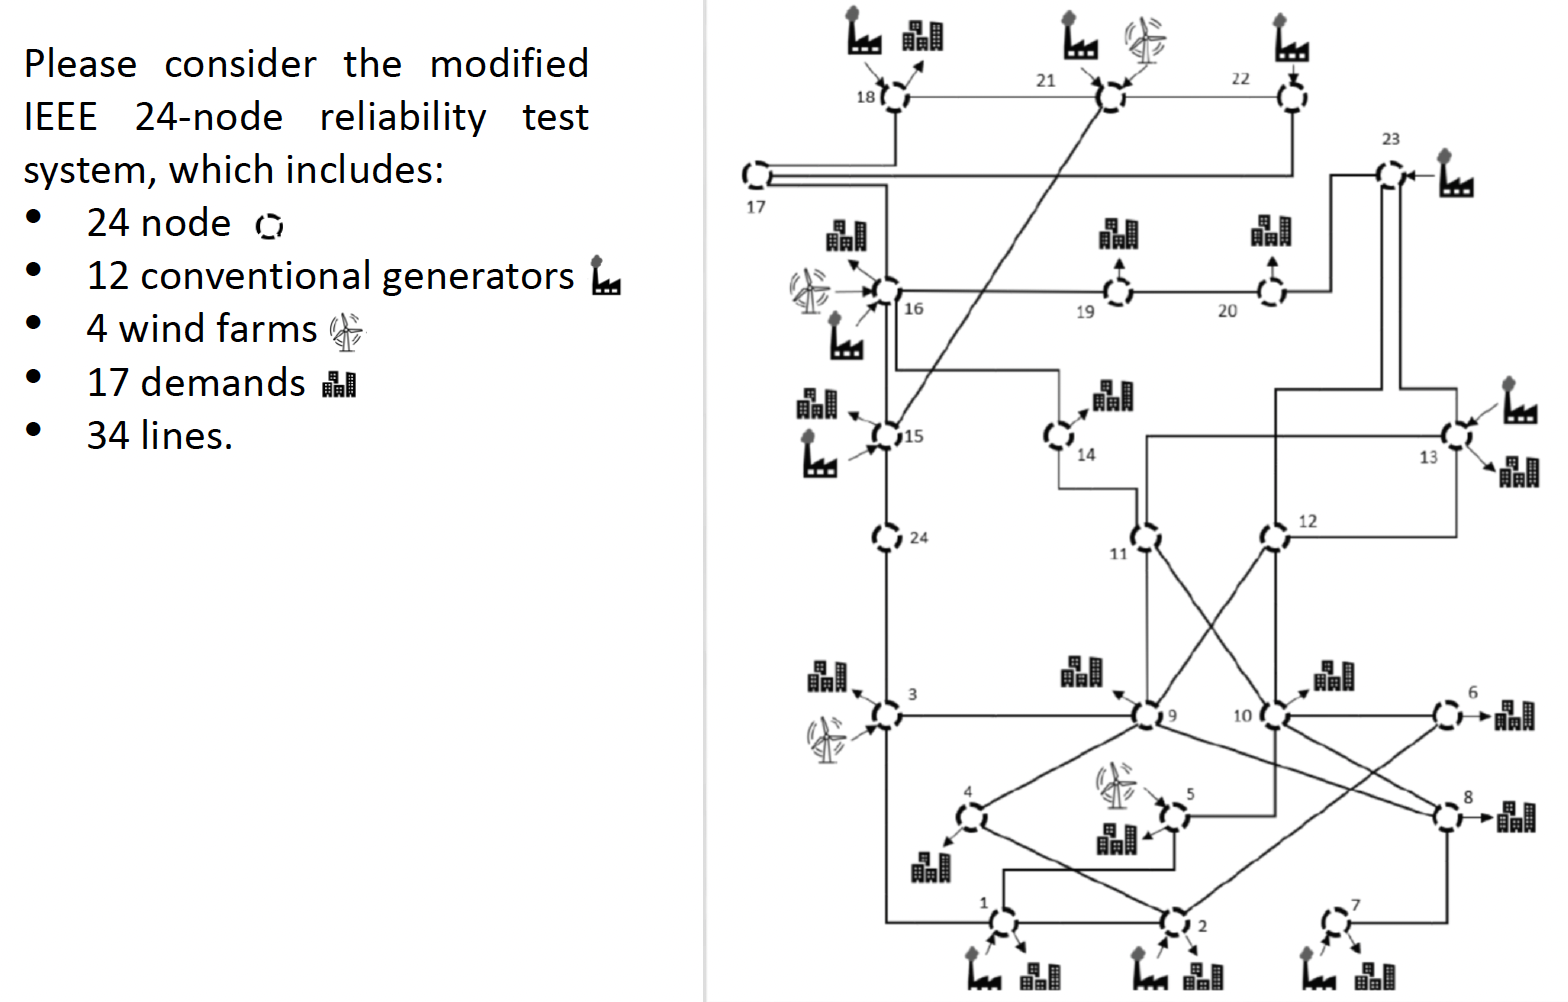

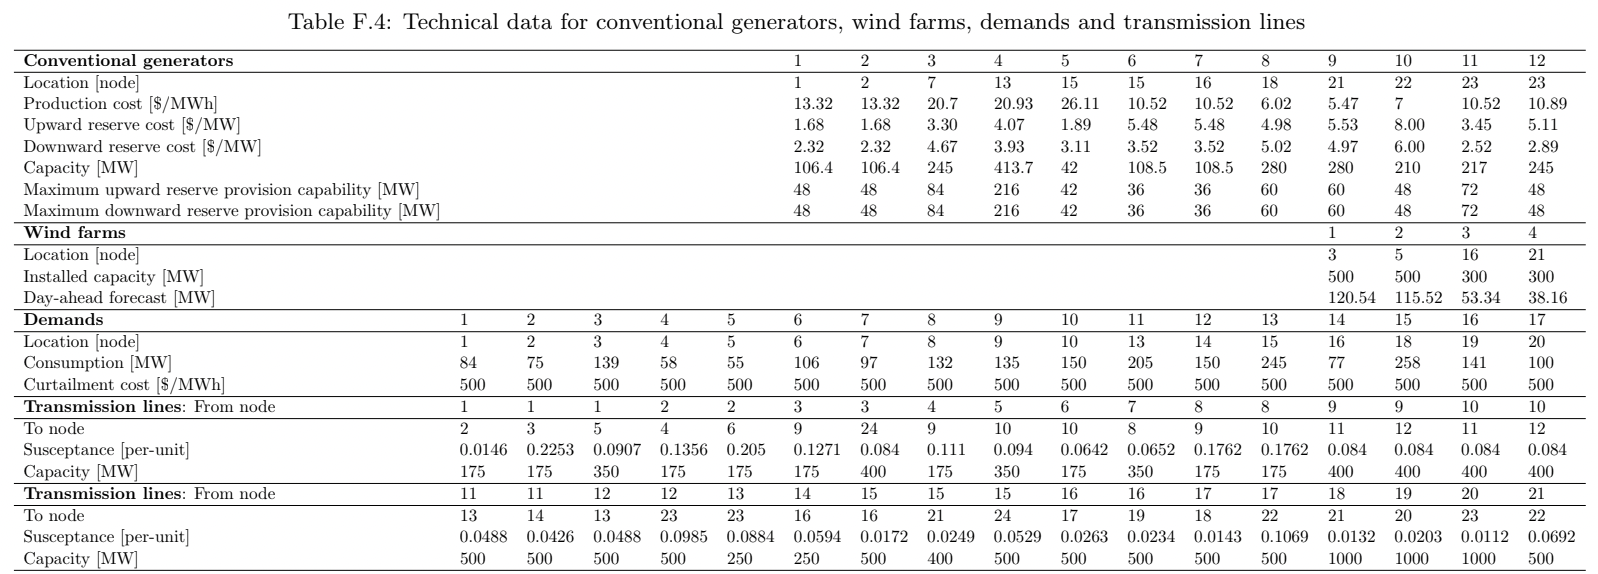

In [1]:
# Import Data
## Conventional Generators data
Conventional_generators = [
        1 2 7 13 15 15 16 18 21 22 23 23;
        13.32 13.32 20.7 20.93 26.11 10.52 10.52 6.02 5.47 7 10.52 10.89;
        1.68 1.68 3.30 4.07 1.89 5.48 5.48 4.98 5.53 8.00 3.45 5.11;
        2.32 2.32 4.67 3.93 3.11 3.52 3.52 5.02 4.97 6.00 2.52 2.89;
        106.4 106.4 245 413.7 42 108.5 108.5 280 280 210 217 245;
        48 48 84 216 42 36 36 60 60 48 72 48;
        48 48 84 216 42 36 36 60 60 48 72 48;
    ]

##  Wind Farms data
Wind_farms = [
    3 5 16 21;
    500 500 300 300;
    120.54 115.52 53.34 38.16;
]

## Demands data
Demands = [
    1   2   3   4   5   6 7 8 9 10 13 14 15 16 18 19 20;
    84  75  139 58  55  106 97  132 135 150 205 150 245 77  258 141 100;
    500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500;
    ]

## Transmission_lines Data
Transmission_fir = [
    1 1 1 2 2 3 3 4 5 6 7 8 8 9 9 10 10;
    2 3 5 4 6 9 24 9 10 10 8 9 10 11 12 11 12;
    0.0146 0.2253 0.0907 0.1356 0.205 0.1271 0.084 0.111 0.094 0.0642 0.0652 0.1762 0.1762 0.084 0.084 0.084 0.084;
    175 175 350 175 175 175 400 175 350 175 350 175 175 400 400 400 400;
]
Transmission_sec =[
    11 11 12 12 13 14 15 15 15 16 16 17 17 18 19 20 21;
    13 14 13 23 23 16 16 21 24 17 19 18 22 21 20 23 22;
    0.0488 0.0426 0.0488 0.0985 0.0884 0.0594 0.0172 0.0249 0.0529 0.0263 0.0234 0.0143 0.1069 0.0132 0.0203 0.0112 0.0692;
    500 500 500 500 250 250 500 400 500 500 500 500 500 1000 1000 1000 500;
]
Transmission_lines = hcat(Transmission_fir, Transmission_sec)

# Get number of elements connected to the grid from Data

N_G = Int64.(size(Conventional_generators,2)) # number of Conventional_generators
N_W = Int64.(size(Wind_farms,2)) # number of Wind_farms
N_D = Int64.(size(Demands,2)) # number of Demands
N_l = Int64.(size(Transmission_lines,2)) # number of Transmission_lines
N_n = Int64.(findmax(Transmission_lines[1:2,:])[1]) # number of nodes
N_a = 2 # number of zones

## Get information from Input 

# conventional generators
cg_location = Int64.(Conventional_generators[1,:])          # Node location of conventional generators [Node]
cg_production_cost = Conventional_generators[2,:]       # Production cost of conventional generators [$/MWh]
cg_upward_reserve_cost = Conventional_generators[3,:]   # Upward reserve cost of conventional generators [$/MWh]
cg_downward_reserve_cost = Conventional_generators[4,:] # Downward reserve cost of conventional generators [$/MWh]
cg_capacity = Conventional_generators[5,:]              # [MW]
cg_max_upward_reserve_provision_capability = Conventional_generators[6,:]   # [MW]
cg_max_downward_reserve_provision_capability = Conventional_generators[7,:] # [MW]

# wind farm
wf_location = Int64.(Wind_farms[1,:])       # [Node]
wf_installed_capacity = Wind_farms[2,:] # [MW]
wf_day_ahead_forecast = Wind_farms[3,:] # [MWh]

# demands
d_location = Int64.(Demands[1,:])    # [Node]
d_consumption = Demands[2,:]         # [MWh]
d_curtaliment_cost = Demands[3,:]    # [$/MWh]

# transmission lines
tl_from_node = Transmission_lines[1,:]
tl_to_node = Transmission_lines[2,:]
tl_impedance = Transmission_lines[3,:]
tl_capacity = Transmission_lines[4,:]
tl_susceptance = 1 ./ Transmission_lines[3,:];